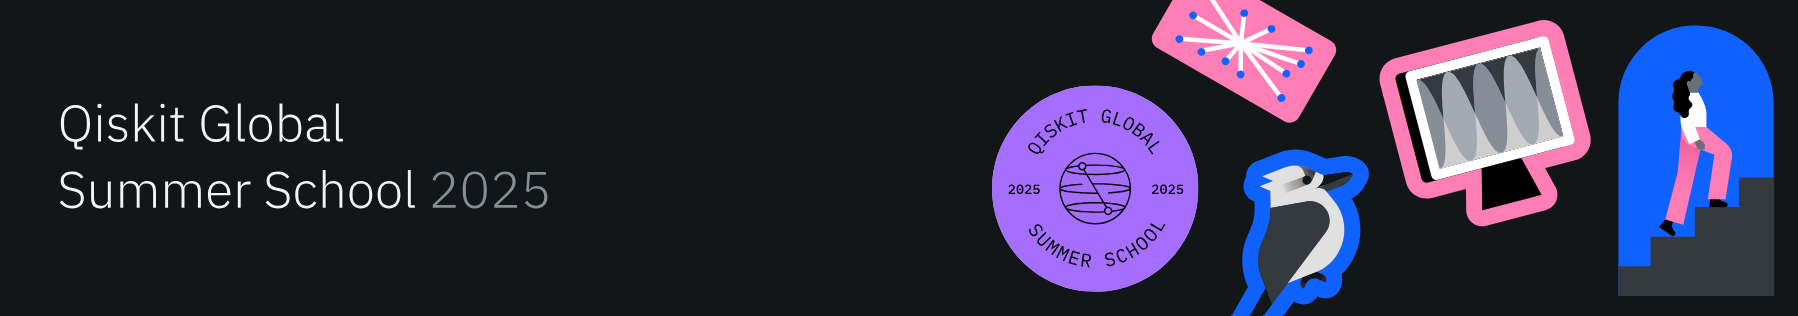

# Lab 1: Recreating famous experiments at home!

# 0. Setup: Gathering Our Tools

Just like any good experiment, we first need to prepare our equipment. In our case, we need to prepare the Python libraries we'll use, especially Qiskit, our quantum computing toolkit. You should be all set if you finished lab 0. If not, you can uncomment the follow cell to install the grader, which will install Qiskit v2.x and the necessary libraries necessary for the Summer School.

In [ ]:
# %pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to c:\users\s_sar\appdata\local\temp\pip-install-y_r8t03n\qc-grader_19bf479769e249f0b3ba23c59faf51c6
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit bf2921e2394472db4a600bdaa4df104fb8f3356a
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for qc-grader: filename=qc_grader-0.22.10-py3-none-any.whl size=2519215 sha256=5008bcb7929eb47a55a40e2f307e68c070b2ab7fcbceaf893492adabba4dee13
  Stored in directory: C:\Users\s_sar\AppData\Local\Temp\pip-ephem-wheel-cache-i5h1dtai\wheels\50\b7\39\4a214a1b3d27e5a7b1a5b0f5131aff4ad3f7f07f5d6a1af3d5
Successfully built qc-grader
  Attempting uninstall: qc-grader
    Found existing installation: qc_grader 0.22.9
    Uninstalling qc_grader-0.22.9:
      Successfully uninstalled qc_grader-0.22.9
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git 'C:\Users\s_sar\AppData\Local\Temp\pip-install-y_r8t03n\qc-grader_19bf479769e249f0b3ba23c59faf51c6'


In [3]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.10


You should have Qiskit version `>=2.0.0` and Grader `>=0.22.9`. If you see a lower version, you need to restart your kernel and reinstall the grader.
Also make sure you have set up everything according to lab 0 and test it with the cell below.

In [4]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'q9Hv2sbk4d7hrpGoyvMa-LDNoxVa_1AtuI5yNYciUSuJ',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/d76a259dc75343469a5eee4513ca902f:a1f1c458-f46e-4610-b455-e781638fd94b::',
  'verify': True,
  'private_endpoint': False}}

## Imports

The cell below imports these necessary libraries and prints your Qiskit version.

In [5]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

---
# Table of Contents

1.  Superposition, Interference and Measurement
    1.  Double-slit Experiment - Superposition, Interference
    2.  Schrödinger’s Cat and Double-slit Revisit
2.  Entanglement
    1.  The Curious Case of Alice, Bob, and the Unbeatable Game - CHSH Game
    2.  Quantum Teleportation - Sending Secrets with Spooky Action
        1.  Teleportation on a Simulator
3. (Bonus Challenge) Teleportation on Real Quantum Hardware
---

Welcome to the very first QGSS Lab of 2025, the International Year of Quantum! In the first lab, we’ll explore four of the most important concepts of the quantum world: superposition, interference, measurement, and entanglement - through hands-on experiments using Qiskit.

# Chapter 1: Superposition, Interference and Measurement

To kick off this exciting journey, we’ll begin by diving into superposition, interference, and quantum measurement through the famous double-slit experiment. **Superposition** means a quantum particle - for example, an electron or a photon — can exist in multiple states at once, like being in two places or having two energies at the same time. It's like flipping a coin with the result of heads and tails at the same time... until you look! **Interference** describes what happens when these quantum possibilities, behaving like waves, overlap. If they are in phase, they reinforce each other (constructive interference), and if out of phase, they can weaken or cancel each other out (destructive interference).

One of the most famous experiments demonstrating these concepts is the **double-slit experiment**, first done by Thomas Young in 1801 and later repeated with individual particles like electrons. When no one watches which slit the particle goes through, the result is a beautiful interference pattern, like waves overlapping. But the moment you **measure** which slit it goes through, the pattern disappears. It’s as if the particle knows it’s being watched!

This strange idea was taken to the next level by Erwin Schrödinger in 1935 with the famous thought experiment known as **Schrödinger's Cat**, where a cat can be both alive and dead until someone opens the box to check. Measurement in quantum mechanics doesn’t just observe reality, it shapes it.

Ready to experience quantum weirdness yourself? With Qiskit, you can do the double-slit experiment - with and without measurement - and see for yourself the beautiful patterns of superposition and interference, as well as the effects measurement has on quantum systems. It’s a fun and eye-opening way to explore the mysteries of the quantum world!

## Through the Slits: Where Quantum Weirdness Begins

<p style="text-align:center;">
    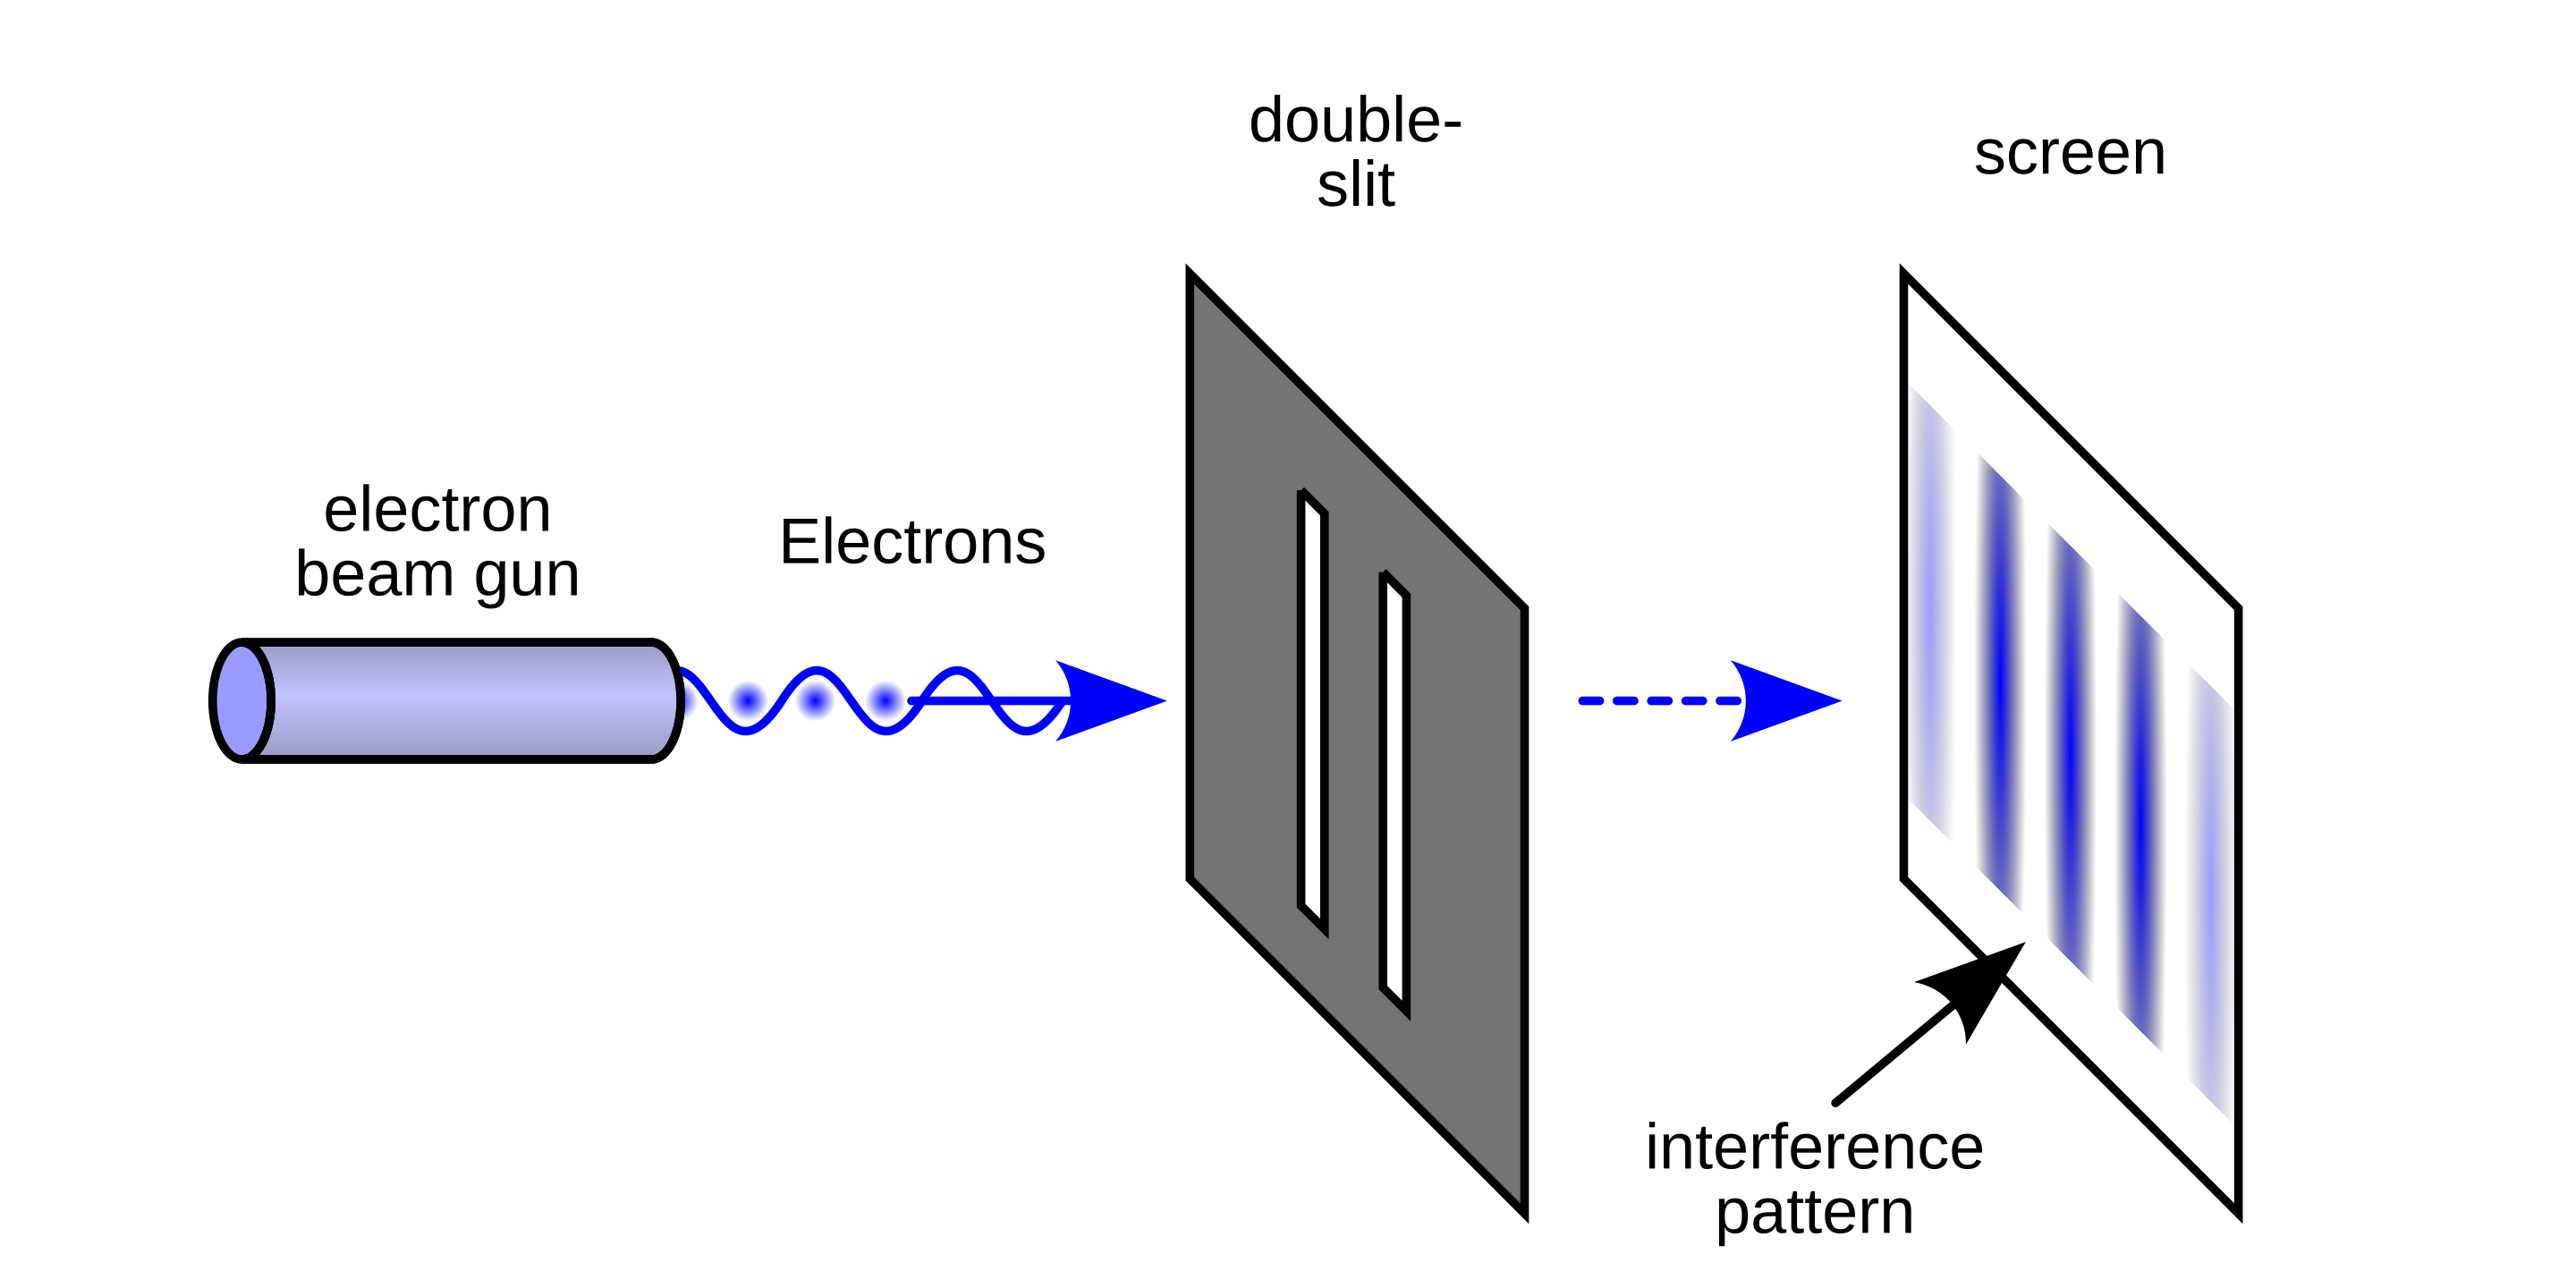
</p>
<p style="text-align:center;">
    image from wikipedia
</p>



In his paper "Experiments and calculations relative to physical optics" 1803, Thomas Young explains about his experiments in this quotation:
> I made a small hole in a window-shutter, and covered it with a piece of thick paper, which I perforated with a fine needle. For greater convenience of observation, I placed a small looking glass without the window-shutter, in such a positioned as to reflect the sun's light, in a direction nearly horizontal, upon the opposite wall, and to cause the cone of diverging light to pass over a table, on which were several little screens of card-paper. [1](https://royalsocietypublishing.org/doi/pdf/10.1098/rstl.1804.0001)

With this experiment, he could observe beautiful fringe patterns by light and explained this comes from the differences in the lengths of the paths of two rays. George Paget Thomson later reproduced a similar experiment using electrons (electron diffraction experiment), and showed that even particles like electrons exhibit wave-like behavior, as demonstrated in his 1927 paper. [2](https://royalsocietypublishing.org/doi/10.1098/rspa.1927.0130) Later in 1965, Feynman explained the double-slit experiment in his "Lectures on Physics, Vol. 3, Chapter 1", and explained this comes from the superposition and interference concepts of quantum mechanics.

Now we can reproduce this fascinating quantum phenomenon using Qiskit, without complex physical equipment. Let's see how superposition and interference are implemented in quantum circuits.

The first step is mapping the physical double-slit experiment to a quantum circuit, which is your first exercise.

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a quantum circuit for the double-slit experiment</b>

-   Exercise 1-1: Make a slit

**Your Goal:** Create a quantum circuit that models a particle (qubit) passing through two slits, achieving a superposition of being in the $|0\rangle$ (lower slit) and $|1\rangle$ (upper slit) states.

Let's define the upper slit as the 
$|1\rangle$ state of a qubit and the lower slit as the $|0\rangle$ state. Implement a quantum circuit where a qubit, initially in $|0\rangle$, passes through the slits in a superposition of $|0\rangle$ and $|1\rangle$ using the [Hadamard gate](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.library.HGate). Draw your circuit.

**Hint**: It can be beneficial for clarity to assign specific names to `QuantumRegister` (e.g., `name='q'`) and `ClassicalRegister` (e.g., `name='c_screen'`) when interpreting measurement data.

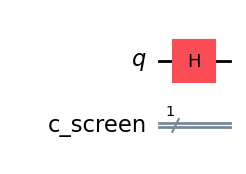

In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit = QuantumCircuit(qr, cr)
# your code here
double_slit.h(qr[0])  # Apply Hadamard gate to create superposition


# end of your code
double_slit.draw('mpl')

In [17]:
# Submit your answer using the following code
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


<div class="alert alert-block alert-success">
<b>Exercise 1: Build a quantum circuit for the double-slit experiment</b>

-   Exercise 1-2: Make a screen

**Your Goal:** Extend the previous circuit to model the screen where interference occurs. Specifically, implement the center of the screen where no phase difference is introduced, and then measure the qubit.

Now, implement the screen where the two superposed quantum states create an interference pattern by adding a gate. First, let's implement the center of the screen, where the two beams combine with no phase difference (resulting in the $|0\rangle$ state). Then measure the qubit from `qr` and store the result in `c_screen`.

**Hint**: You can use the Hadamard gate again.
</div>

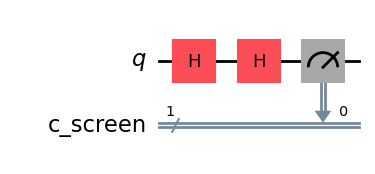

In [23]:
# your code here
double_slit.h(qr[0])  # Apply Hadamard gate again
double_slit.measure(qr[0], cr[0]) 

# end of your code
double_slit.draw('mpl')

In [24]:
# Submit your answer using the following code
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Let's check the execution result. Assuming the screen detects the qubit in the $|0\rangle$ state, the following code runs the circuit on an ideal simulator. A probability of 1 means 100%.

<div class="alert alert-block alert-info">
<b>Note on Retrieving Measurement Results with SamplerV2</b> 

When using *SamplerV2* in Qiskit, how you retrieve measurement counts depends on how you've set up your classical registers and measurements:

1.  Named Classical Register in *QuantumCircuit*:
    If you define your circuit with a named classical register, e.g., *cr = ClassicalRegister(1, name='my_results')* and *qc = QuantumCircuit(qr, cr)*, and then measure to it *qc.measure(qr[0], cr[0])*, you access the counts using that name:

    
    ```python
    # result = job.result()
    # counts = result[0].data.my_results.get_counts()
    ```
    
    In our double-slit circuit, we used *cr = ClassicalRegister(1, name='c_screen')*, so we will use *result[0].data.c_screen.get_counts()*.

3.  measure_all():
    If you use *qc.measure_all()*, Qiskit automatically adds classical bits and names the output data field `meas`:

    
    ```python
    # qc.measure_all()
    # ...
    # counts = result[0].data.meas.get_counts()
    ```

5.  Implicit Classical Bits (No Named Register in *QuantumCircuit*):
    If you create a circuit like *qc = QuantumCircuit(1, 1)* (1 qubit, 1 classical bit) or *qc = QuantumCircuit(QuantumRegister(1), ClassicalRegister(1))* without naming the classical register in its constructor, and then use *qc.measure(0, 0)*, the *SamplerV2* might store results under a default name (often *c*, or based on the classical bit indices like *c0*).
    For *qc = QuantumCircuit(1,1)* and *qc.measure(0,0)*, the output might be accessed as follows:

    ```python 
     # counts = result[0].data.c0.get_counts() # If single bit named c0, the indice can vary. You can see the actual indices when you plot your circuit.
    ```
</div>

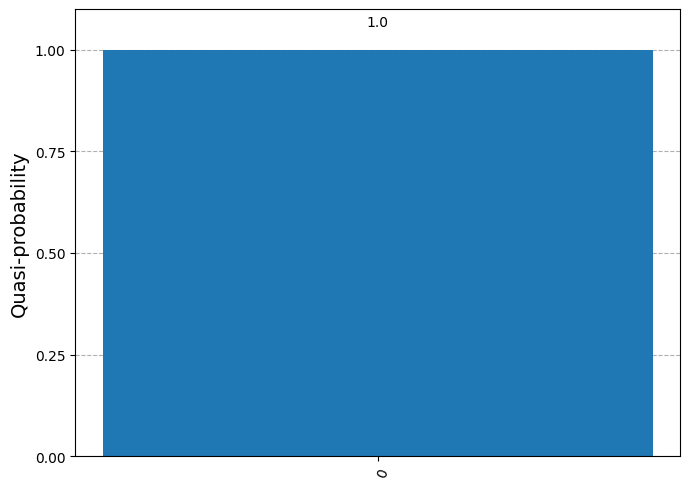

In [25]:
# use simulator
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a quantum circuit for the double-slit experiment</b>

-   Exercise 1-3: Make a difference

**Your Goal:** Modify the double-slit circuit to introduce a phase difference between the two paths (slits) and observe its effect on the measurement outcome at the screen.

Now, let's implement another part of the screen. The path difference between the two beams is implemented as a phase difference between $|0\rangle$ and $|1\rangle$. Apply a phase of $\pi/2$ only to the $|1\rangle$ state of the superposed quantum state and observe the measurement results. (Hint: Use a gate that applies a phase to the $|1\rangle$ state. The [P gate](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.library.PhaseGate) and the [S gate](https://quantum.cloud.ibm.com/docs//api/qiskit/qiskit.circuit.library.SGate) are representative examples.)
</div>

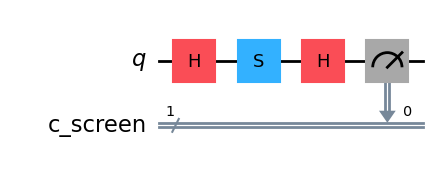

In [ ]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

#your code here

# Step 2: Add phase difference to |1⟩ path
double_slit_with_difference.s(0)  # Applies π/2 phase to |1⟩ component
# double_slit_with_difference.p(pi/2, qr[0]) # or this can also be used with from math import pi

#end of your code

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr, cr)
double_slit_with_difference.draw('mpl')

In [27]:
# Submit your answer using the following code
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


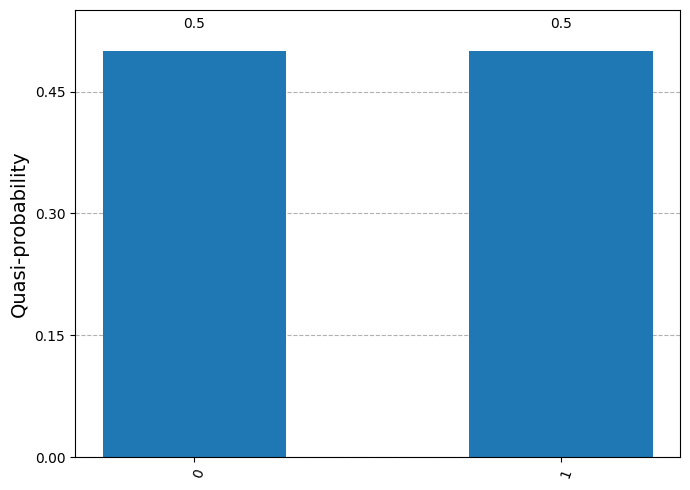

In [28]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

As you can see, the probability of measuring $|0\rangle$ decreased to approximately 0.5 (50%), signifying reduced brightness at this point on the screen.
 

Before we go further let's do a simple mathematics demonstration of this process in regards to superposition, interference, and the probability of measuring a quantum state. You can skip this part if you are already familiar with this concept.

<details>
<summary> <h3>Superposition, Interference and the Probability of Measurement </h3> </summary>


In our quantum circuit implementation of the double-slit experiment, we used a sequence of Hadamard (H) gates and a phase gate (P). Let's break down the mathematical representation of the quantum state at each step and analyze the superposition, interference, and measurement probability.

**1. Initialization:**

We start with a single qubit initialized in the $|0\rangle$ state, representing the electron starting at a source before the slits:

$$ |\psi_0\rangle = |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $$

Here we will assume $ |\psi_1\rangle$ is another quantum state that can pass the upper slit - this will be:

$$ |\psi_1\rangle = |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

**2. Superposition (First Hadamard Gate):**

The first Hadamard gate (H) is applied to the qubit. This operation creates a superposition of the $|0\rangle$ and $|1\rangle$ states, representing the electron passing through both slits simultaneously:

$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$

Applying H to $|\psi_0\rangle$:

$$ |\psi_1\rangle = H |\psi_0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) $$

This state $|\psi_1\rangle$ shows the qubit is in an equal superposition of the $|0\rangle$ state (representing one slit) and the $|1\rangle$ state (representing the other slit).

**3. Phase Shift (P Gate):**

The phase gate (P) introduces a relative phase $\phi$ between the $|0\rangle$ and $|1\rangle$ components of the superposition. This phase difference corresponds to the path difference experienced by the electron waves passing through the two slits in the physical experiment. The P gate is defined as:

$$ P(\phi) = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{pmatrix} $$

Applying P($\phi$) to $|\psi_1\rangle$:

$$ |\psi_2\rangle = P(\phi) |\psi_1\rangle = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{pmatrix} \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ e^{i\phi} \end{pmatrix} = \frac{1}{\sqrt{2}} (|0\rangle + e^{i\phi}|1\rangle) $$

The state $|\psi_2\rangle$ now contains the relative phase information, which is crucial for interference.

**4. Interference (Second Hadamard Gate):**

The second Hadamard gate is applied to bring the superposed states back together, allowing them to interfere:

$$ |\psi_3\rangle = H |\psi_2\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ e^{i\phi} \end{pmatrix} = \frac{1}{2} \begin{pmatrix} 1 + e^{i\phi} \\ 1 - e^{i\phi} \end{pmatrix} $$

Expanding $e^{i\phi} = \cos(\phi) + i\sin(\phi)$:

$$ |\psi_3\rangle = \frac{1}{2} \begin{pmatrix} 1 + \cos(\phi) + i\sin(\phi) \\ 1 - (\cos(\phi) + i\sin(\phi)) \end{pmatrix} = \frac{1}{2} \begin{pmatrix} (1 + \cos(\phi)) + i\sin(\phi) \\ (1 - \cos(\phi)) - i\sin(\phi) \end{pmatrix} $$

This final state before measurement embodies the interference effect, where the probabilities of measuring $|0\rangle$ or $|1\rangle$ depend on the phase difference $\phi$.

**5. Probability of Measurement:**

The probability of measuring the qubit in the $|0\rangle$ state (corresponding to one part of the screen) is given by the squared magnitude of the amplitude of $|0\rangle$ in $|\psi_3\rangle$:

$$ P(|0\rangle) = \left| \frac{1}{2} (1 + e^{i\phi}) \right|^2 = \left| \frac{1}{2} (1 + \cos(\phi) + i\sin(\phi)) \right|^2 $$

$$ P(|0\rangle) = \frac{1}{4} [(1 + \cos(\phi))^2 + (\sin(\phi))^2] = \frac{1}{4} [1 + 2\cos(\phi) + \cos^2(\phi) + \sin^2(\phi)] $$

Using the identity $\cos^2(\phi) + \sin^2(\phi) = 1$:

$$ P(|0\rangle) = \frac{1}{4} [1 + 2\cos(\phi) + 1] = \frac{1}{4} [2 + 2\cos(\phi)] = \frac{1}{2} (1 + \cos(\phi)) $$

In case of $\phi = \pi/2$, $P(|0\rangle) = \frac{1}{2} (1 + \cos(\pi/2)) = 0.5$, as we checked already.

</details>


Let's conclude Exercise 1 by generating the fringe pattern using a range of $\phi$.

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a quantum circuit for the double-slit experiment</b>

-   Exercise 1-4: Beautiful Fringes

**Your Goal:** Create a parameterized quantum circuit where the phase difference $\phi$ can be varied, allowing you to simulate and visualize the complete interference fringe pattern.

Qiskit allows [using `Parameters` in quantum circuits](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.Parameter). We'll use this with the `Sampler` to observe interference fringes.

Define a parameterized quantum circuit for the double-slit experiment with a variable parameter $\phi$. A common structure is H-gate, then $P(\phi)$, then another H-gate, before measurement. Measure `q` and save to `c_screen`.
</div>

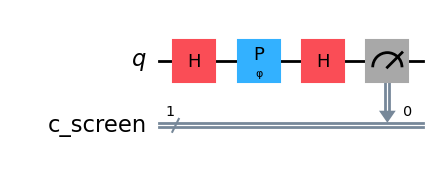

In [29]:
φ = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

#your code here
double_slit_fringe.h(qr[0])  # Apply Hadamard gate to create superposition
double_slit_fringe.p(φ, qr[0])
double_slit_fringe.h(qr[0])
double_slit_fringe.measure(qr, cr)
#end of your code

double_slit_fringe.draw('mpl')

In [31]:
# Submit your answer using the following code
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Excellent! Now, let's use this parameterized circuit to plot the fringe pattern using matplotlib's heat map. The code below generates 100 phase values, runs the circuits (1000 shots each) via `Sampler`, stores the probability of measuring $|0\rangle$, and plots the heat map.

<div class="alert alert-block alert-warning">
<b>Resource limit</b>

When running the code below on an actual backend, increasing the number of parameters or shots consumes more QPU time than might be expected. The current configuration (100 parameterized circuits + 1000 shots) uses less than 1 minute of QPU time, so please try to maintain these settings if possible.

</div>

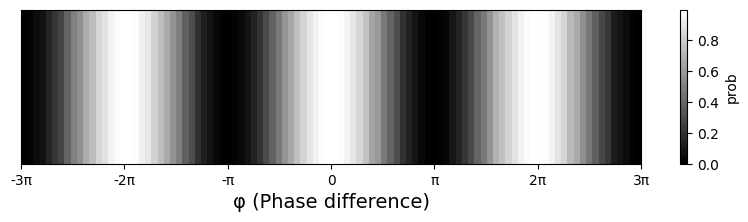

In [32]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

Fantastic! You've reproduced the double-slit experiment's fringes using qubits. Next, we'll explore quantum measurement with Schrödinger's cat and then see how observation affects the double-slit outcome.

## Schrödinger's Cat: Exploring Quantum Superposition and the Act of Observation

This thought experiment by Erwin Schrödinger (1935, ["Die gegenwärtige Situation in der Quantenmechanik"](https://link.springer.com/article/10.1007/BF01491891)) illustrates quantum superposition and measurement's role in collapsing possibilities into a single outcome. A cat is sealed in a box with a radioactive atom. If the atom is in a superposition of decayed/not decayed, the cat, entangled with it, should be in a superposition of alive/dead until observed.

Here, we'll use a rotational gate. Imagine a cat disliking the $|1\rangle$ state. Let's see if the cat is happy or upset when we "open the box" (measure the qubit). Be careful! An angry quantum cat might scratch you.

<div class="alert alert-block alert-success">
<b>Exercise 2: Is the cat happy or grumpy?</b>

**Your Goal:** Create a quantum circuit that prepares a qubit in a superposition state using an $R_X(\theta)$ gate, then simulate a single measurement to determine if the "cat" (represented by the qubit state) is "happy" ($|0\rangle$) or "grumpy" ($|1\rangle$).

Complete the Python code below using the [Rotational X gate](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.library.RXGate) with $\theta \in [0, 2\pi]$ to prepare a qubit in various superposition states. Then, measure once to see if the cat is happy ($|0\rangle$) or grumpy ($|1\rangle$). $\theta$ will be given to you by the slider.
</div>

In [6]:
def schrodingers_cat_experiment_theta(theta):
    
    qc = QuantumCircuit(1)

    #your code start here

    qc.rx(theta, 0)  # Apply RX gate to create superposition state
    
    #end of your code

    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1 
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc

In [7]:
# Submit your answer using the following code
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Now, use the widget below to check the cat's mood. Make sure `happy.png` and `grumpy.png` are in the same folder. (Image credit: James Weaver)

In [ ]:
happy_img = Image.open('happy.png')
grumpy_img = Image.open('grumpy.png')

out = widgets.Output()

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ',
    continuous_update=True
)

button = widgets.Button(
    description='Open the Box',
    button_style='success'
)
    
def on_button_click(b):
    with out:
        out.clear_output(wait=True)  # clean output

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result==True:
            img = happy_img
            txt = "happy"
        else:
            img = grumpy_img
            txt = "grumpy"

        new_size = (400, 400)
        resized_img = img.resize(new_size)
        
        buf = io.BytesIO()
        resized_img.save(buf, format='PNG')
        buf.seek(0)
        probability = int(np.cos(slider.value/2)**2 * 100)

        display(f"The probability of cat is happy: {probability}%")
        display(f"The observed cat is : {txt}")
        display(widgets.Image(value=buf.read(), format='png'))

button.on_click(on_button_click)

display(slider, button, out)

FloatSlider(value=0.0, description='θ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()


Before we revisit the double-slit experiment, let's clarify what happens when we try to observe or "measure" a qubit, especially after applying a gate like $R_x(\theta)$. If you are familiar with quantum measurement, you can skip this part.

<details>
<summary> <h3>Quantum Measurement details: Observing the Qubit </h3> </summary>

**1. Qubit State Before Measurement:**
After $R_x(\theta)$ on $|0\rangle$, the state is a superposition:
$$|\psi\rangle = R_x(\theta)|0\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle - i \sin\left(\frac{\theta}{2}\right)|1\rangle = \alpha|0\rangle + \beta|1\rangle$$
where $|\alpha|^2 + |\beta|^2 = 1$.

**2. Act of Measurement:**
Measurement in the computational basis ($\{|0\rangle, |1\rangle\}$) forces the qubit to choose one state. The superposition is not directly observable.

**3. Probabilistic Outcomes:**
Probability of measuring $|0\rangle$: $P(0) = |\alpha|^2 = \cos^2\left(\frac{\theta}{2}\right)$
Probability of measuring $|1\rangle$: $P(1) = |\beta|^2 = \sin^2\left(\frac{\theta}{2}\right)$

**4. State Collapse:**
Post-measurement, the state collapses:
* If '0' is measured $\rightarrow$ state becomes $|0\rangle$.
* If '1' is measured $\rightarrow$ state becomes $|1\rangle$.
This "collapse" destroys the superposition.

**Connection to Double-Slit:**
Detecting which slit a particle uses is a measurement. It collapses the particle's wave function to a definite path, destroying the superposition needed for interference fringes.
</details>

Let's revisit the double-slit experiment.

## Double-slit with Measurement

<div class="alert alert-block alert-success">
<b>Exercise 3: Double-slit with a path detector</b>

**Your Goal:** Construct a double-slit circuit that includes an intermediate measurement acting as a "which-path" detector. This will allow you to observe how acquiring information about the particle's path affects the final interference pattern.

Modify the double-slit circuit to include a "which-path" detector (a measurement after the first H-gate).

Setup:
* `qr`: 1 qubit (`'q'`).
* `cr1`: 1 classical bit (`'c_detector'`) for path detection.
* `cr2`: 1 classical bit (`'c_screen'`) for final measurement.
* `φ`: A `Parameter` for the phase gate.

**Hint**: Your circuit will have two measurements.
</div>

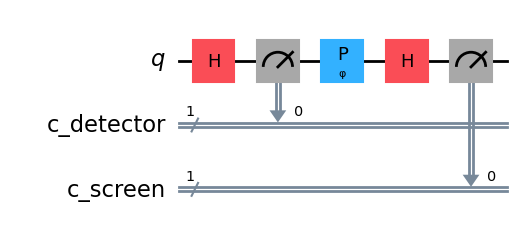

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

φ = Parameter('φ')

#your code here
double_slit_with_detector.h(qr[0])  # Apply Hadamard gate to create superposition
double_slit_with_detector.measure(qr[0], cr1[0])
double_slit_with_detector.p(φ, qr[0])
double_slit_with_detector.h(qr[0])
double_slit_with_detector.measure(qr[0], cr2[0])

#end of your code

double_slit_with_detector.draw('mpl')

In [14]:
# Submit your answer using the following code
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Now, repeat the heat map generation to see the new pattern with the detector.

**Warning**: This can take minutes

<div class="alert alert-block alert-warning">
<b>Resource limit</b>

When running the code below on an actual backend, increasing the number of parameters or shots consumes more QPU time than might be expected. The current configuration (100 parameterized circuits + 1000 shots) uses less than 1 minute of QPU time, so please try to maintain these settings.

</div>

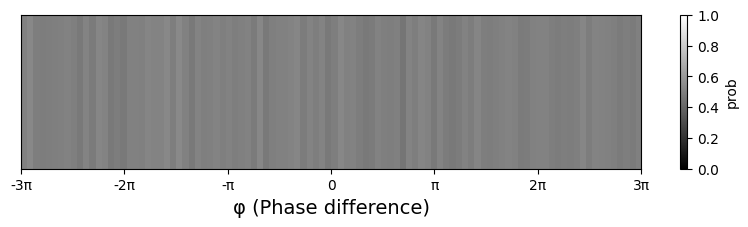

In [ ]:
# use simulator
backend = AerSimulator()
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)

# run and get counts
sampler = Sampler(mode=backend)

φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

You should see a mostly gray pattern, indicating roughly 50% probability of measuring $|0\rangle$ regardless of $\phi$. The interference fringes have vanished!

<details> 
<summary> <h3>Look into how detector works</h3></summary>

1.  **Initial State**: $|\psi_0\rangle = |0\rangle$
2.  **First H-gate**: $|\psi_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ (particle can pass through both slits)
3.  **First Measurement (Detector)**: Collapses the superposition.
    * Outcome 0 (prob 1/2) $\rightarrow |\psi_{2a}\rangle = |0\rangle$
    * Outcome 1 (prob 1/2) $\rightarrow |\psi_{2b}\rangle = |1\rangle$
    The qubit is now in a definite state.
4.  **P-gate**:
    * If outcome 0: $|\psi_{3a}\rangle = P(\phi)|0\rangle = |0\rangle$
    * If outcome 1: $|\psi_{3b}\rangle = P(\phi)|1\rangle = e^{i\phi}|1\rangle$
    The phase $\phi$ cannot act as a *relative* phase for interference due to the collapse.
5.  **Second H-gate**:
    * If outcome 0: $|\psi_{4a}\rangle = H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
    * If outcome 1: $|\psi_{4b}\rangle = H(e^{i\phi}|1\rangle) = e^{i\phi} \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$
6.  **Second Measurement (Screen)**:
    * If first measurement was 0: Prob(final '0') = 1/2, Prob(final '1') = 1/2.
    * If first measurement was 1: Prob(final '0') = 1/2, Prob(final '1') = 1/2.

**Conclusion**: Regardless of the detector's outcome, the final measurement is always 50/50 for $|0\rangle$ or $|1\rangle$. The intermediate measurement destroyed the superposition, and thus the interference. This demonstrates that "which-path" information destroys interference.
</details>



So far, we've explored superposition, interference, and measurement. Now, let's dive into another profound quantum phenomenon: **entanglement**.


# Chapter 2: Entanglement

**Quantum entanglement** is a phenomenon where particles become interconnected, sharing a quantum state that links their properties, no matter how far apart they are. Measuring one particle's state instantly reveals information about the state of the other. Einstein called this “spooky action at a distance”.

In 1964, John Bell proposed Bell’s inequality to test if entangled particles behave classically. The CHSH experiment provided a concrete test. Quantum mechanics passed, defying classical expectations [3]. In 1997, quantum teleportation — transferring a quantum state without moving the particle — was achieved using entanglement [4].

With Qiskit, let's try the CHSH experiment and quantum teleportation.


## 2.1. The Curious Case of Alice, Bob, and the Unbeatable Game - CHSH Game

Alice and Bob are far apart and cannot communicate. A Referee gives them a challenge:
1.  Referee picks two bits (`x`, `y`), sends `x` to Alice, `y` to Bob.
2.  Alice and Bob instantly reply with their bits (`a`, `b`).
3.  **Win Condition**: `a XOR b == x AND y`.

They want a pre-agreed strategy to maximize their average win rate.

**Your Goal**: Implement the *quantum* strategy for the CHSH game using Qiskit, simulate its performance, and compare it to the classical limit to understand the advantage provided by quantum entanglement. 


<div class="alert alert-block alert-info">
<b>For your in-depth study </b>

For a more in-depth explanation and exploration of entanglement in action, including the CHSH game, you can refer to the Qiskit learning resource: [Entanglement in Action](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information/entanglement-in-action/introduction).
</div>




### The Classical Limit: Why 75% is the Barrier

Let's first think classically. Since Alice and Bob can't communicate after receiving `x` and `y`, Alice's output `a` can only depend on `x`, and Bob's `b` only on `y`. They could pre-agree on a strategy, even a random one, but it boils down to local choices.

Winning condition means:
* Inputs (0,0), (0,1), or (1,0): Win if `a == b`.
* Input (1,1): Win if `a != b`.

Can you find a fixed strategy (like `a=0, b=0` or `a=x, b=y`) that wins more than 3 out of the 4 possible input cases? Try it! You'll find the maximum average win rate is stubbornly stuck at **75%**, a fundamental limit of local realism.

### The Quantum Strategy: Entanglement to the Rescue!

What if Alice and Bob prepared something special *before* the game? What if they shared a pair of **entangled qubits**? Imagine entanglement like two "magic" coins that are mysteriously linked. Even miles apart, measuring one instantly influences the *correlations* you'll find when measuring the other. They don't send messages faster than light, but their fates are intertwined.

Specifically, they share a [Bell state](https://en.wikipedia.org/wiki/Bell_state): $(|00\rangle + |11\rangle) / \sqrt(2)$. If they both measure their qubit in the *same* way, they always get the same result (both 0 or both 1).

The Quantum Strategy: Instead of outputting fixed bits, Alice and Bob use their input (`x` or `y`) to decide *how* to measure their shared qubit.
1.  Shared Resource: Alice holds qubit 0, Bob holds qubit 1 of their entangled pair.
2.  Measurement Choice (The Clever Part):
    *   Alice (input `x`): Measures along angle 0 (standard Z basis) if `x=0`, or angle π/2 (X basis) if `x=1`.
    *   Bob (input `y`): Measures along angle -π/4 if `y=0`, or angle π/4 if `y=1`, by using `Ry` gate.
3.  Output: They output the result of their respective measurements as `a` and `b`.

These specific angles are crucial! They exploit the unique correlations of the Bell state to maximize their chances of satisfying `a XOR b == x AND y` across all input pairs.

Let's build the quantum circuit for this strategy.

Alice and Bob share an entangled qubit pair in the Bell state: $(|00\rangle + |11\rangle) / \sqrt{2}$. If measured the same way, they always get the same result.

**Note**

For detailed information on the quantum circuit's configuration, its operational flow, or the underlying principles, please refer to [this lesson](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information/entanglement-in-action/chsh-game) in the IBM Quantum LEarning course, Basics of Quantum Information.

### Qiskit Implementation: Building the Quantum Circuit

<div class="alert alert-block alert-success">
<b>Exercise 4: Quantum Circuit for CHSH Game</b>

**Your Goal:** Define a function `create_chsh_circuit(x, y)` by constructing the quantum circuit that Alice and Bob will use for their quantum strategy in the CHSH game. This involves preparing an entangled Bell state and then applying measurement basis rotations based on their respective inputs.

**Tasks:**
* **Task 1:** Create the Bell state $(|00\rangle + |11\rangle) / \sqrt{2}$.
* **Task 2:** Implement Bob's rotation based on his input `y`.
</div>

In [18]:
def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}') # 2 qubits, 2 classical bits

    # ---- TODO : Task 1 ---
    # Implement the gates to create the Bell state |Φ+> = (|00> + |11>)/sqrt(2).

    qc.h(0)  # Apply Hadamard gate to qubit 0
    qc.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target

    # --- End of TODO ---
    qc.barrier()
    # Step 2a: Alice's measurement basis (X if x=1, Z if x=0)
    if x == 1:
        qc.h(0) # H for X-basis measurement
    else:
        qc.z(0)  # Z gate for Z-basis measurement

    ##  --- TODO: Task 2 ----
    # Step 2b: Bob's measurement basis
    if y == 1:
        qc.ry(np.pi/4, 1)  # Apply RY gate to qubit 1 for Y-basis measurement
    else:
        qc.z(1)  # Z gate for Z-basis measurement
    # ry(theta, qubit, label=None)

    
    # --- End of TODO ---
    qc.barrier()
    
    # Step 3: Measure
    qc.measure([0, 1], [0, 1]) # q0 to c0 (Alice), q1 to c1 (Bob) -> 'ba' format

    return qc

In [19]:
# Submit your answer using the following code
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


### Create Circuits for All Input Pairs

Now we use the function you created to generate circuits for all four (x,y) scenarios.

Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


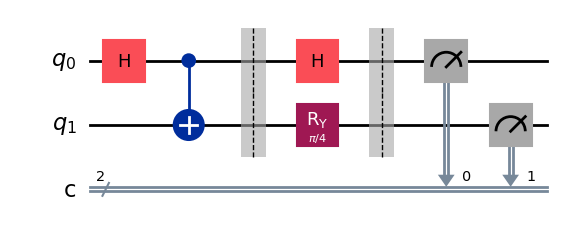

In [20]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")


### Simulation: Playing the Game Many Times

Real quantum computers are noisy and sometimes hard to access. Thankfully, we can simulate their behavior quite accurately for small systems like this one. We'll use Qiskit's `AerSimulator` to run our four circuits many times ("shots") and collect statistics on Alice and Bob's outputs (`a` and `b`).

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 529, '11': 495}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 433, '01': 57, '10': 58, '11': 476}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 274, '01': 254, '10': 246, '11': 250}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 76, '01': 458, '10': 422, '11': 68}

Plotting results...


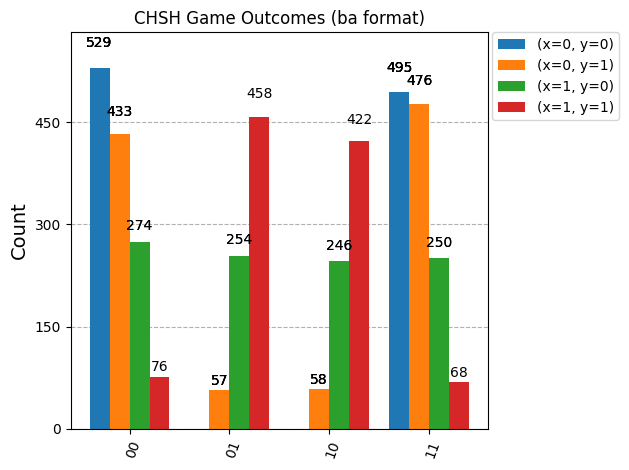

In [26]:
# AerSimulator (if not already defined)
backend = AerSimulator()
# Pass manager (if not already defined)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

SHOTS = 1024

print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: results_chsh[i].data.c.get_counts() where 'c' is the default name of classical register
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

### Analysis: Did They Beat the Classical Limit?

Now, the moment of truth! We need to analyze the simulation results (`counts_list`) to calculate the average win probability.

**Recap:**
*   **Win Condition:** `a XOR b == x AND y`
*   **Output Format:** Counts are for `'ba'` strings.
    *   `a XOR b = 0` for outcomes `'00'` (`b=0, a=0`) and `'11'` (`b=1, a=1`).
    *   `a XOR b = 1` for outcomes `'01'` (`b=0, a=1`) and `'10'` (`b=1, a=0`).


<div class="alert alert-block alert-success">
<b>Exercise 5: Analyze Circuit for CHSH Game</b>

**Your Goal:** Calculate the win probability for Alice and Bob for each input case (`x`, `y`) based on the simulation results, and then determine their overall average win probability using the quantum strategy.

**Tasks:**
* **Task 1:** Determine the target `a XOR b` value for a win, given `x` and `y`.
* **Task 2:** Count shots (`wins_for_this_case`) satisfying the win condition for the current (`x`, `y`).
</div>

In [27]:
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # ---- TODO : Task 1 ---
    # Target (a XOR b) value for winning
    
    target_xor_result = (x & y)  # Winning condition: a XOR b should equal x AND y

    # --- End of TODO --

    wins_for_this_case = 0

    # ---- TODO : Task 2 ---
    # Calculate the total number of shots that satisfy the winning condition determined above. Check the 'target_xor_result'
    
    SHOTS = 0
    for outcome, count in counts.items():
        a, b = int(outcome[0]), int(outcome[1]) # Convert 'ba' format to integers
        if (a ^ b) == target_xor_result:
            wins_for_this_case += count # Count wins where a XOR b matches target_xor_result        
    SHOTS += sum(counts.values())  # Total shots for this case      

    # --- End of TODO --

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01: # Allow for small simulation variance
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02 : # Could be noise or minor error
     print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
     print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")

--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 1.0000
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8877
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.5117
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8594

--- Overall Performance ---
Experimental Average Win Probability: 0.8147
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8147) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [25]:
# Submit your answer using the following code
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


### Conclusion: The Quantum Edge

So, what did we find? If you successfully completed the exercises, your simulation should clearly show that Alice and Bob, using their shared entangled qubits and clever measurements, achieved an average win rate **significantly** higher than the 75% classical limit, likely approaching the theoretical quantum maximum of around **85.4%**.

This isn't just a mathematical trick; it reflects how nature works at its most fundamental level. Entanglement allows for correlations between distant particles that are stronger than any classical theory can explain. This "spooky action at a distance" doesn't allow faster-than-light communication, but it underpins many quantum technologies.

**Discussion Point:** Based on these results, what does the CHSH game demonstrate about the nature of reality compared to classical intuition? Can you think of any potential applications where these stronger-than-classical correlations might be useful?

## 2.2. Quantum Teleportation - Sending Secrets with Spooky Action

Imagine Alice has a qubit (`q0`) in a specific, delicate quantum state (`|ψ⟩`). She wants to send this exact state to Bob, who is far away. She can't simply physically send the qubit (maybe it's too fragile, or she needs the original particle). Can she somehow transfer *only the state* itself?

Classically, this seems impossible. If Alice measures her qubit to see what state it's in, the measurement itself will likely collapse the superposition and destroy the original state.

Enter **Quantum Teleportation**! It's a remarkable protocol that uses **quantum entanglement** and **classical communication** to transfer an unknown quantum state from one qubit to another.

**Disclaimer:** We're teleporting the *state*, not the physical particle! No people are being beamed up here.

**Your Goal:** In this lab, you will implement the quantum teleportation protocol using Qiskit. You'll complete the code to prepare the necessary quantum resources, perform the key steps, and verify that Bob successfully receives Alice's quantum state.

### The Teleportation Protocol: Step-by-Step

The protocol requires three qubits and two classical bits:
*   **`q0`:** Alice's qubit, initially in the state `|ψ⟩` we want to teleport.
*   **`q1`:** Alice's half of a shared entangled pair.
*   **`q2`:** Bob's half of the shared entangled pair.
*   **`c0`, `c1`:** Classical bits to store Alice's measurement results.

Here's the plan:
1.  **(Optional) Prepare Alice's state `|ψ⟩` on `q0`.** (We'll create a specific state like `|+>` for verification).
2.  **Create entanglement:** Generate a Bell pair between `q1` and `q2`.
3.  **Alice's operations:** Alice performs a "Bell measurement" on her two qubits (`q0` and `q1`) and stores the classical results in `c0` and `c1`.
4.  **Classical communication:** Alice sends her two classical bits (`c0`, `c1`) to Bob.
5.  **Bob's corrections:** Bob applies specific quantum gates (X and/or Z) to his qubit (`q2`), conditioned on the values of `c0` and `c1` he received.

If everything is done correctly, Bob's qubit `q2` will end up in the state `|ψ⟩`, the original state of Alice's `q0`!

<div class="alert alert-block alert-info">
<b>For your in-depth study </b>

For a more in-depth explanation and exploration of quantum teleportation, you can refer to the IBM Quantum Learning resources: [Quantum Teleportation](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information/entanglement-in-action/quantum-teleportation) and [Entanglement in Action](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information/entanglement-in-action/quantum-teleportation) by John Watrous. These are part of his [Basics of Quantum Information](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information) course.
</div>

### Tool: Qiskit Dynamic Circuits

For Bob's actions depending on Alice's measurements, we use dynamic circuits. This allows classical information from mid-circuit measurements to influence later quantum operations. This capability is crucial for protocols like teleportation and for creating efficient long-range entanglement on quantum hardware, as explored in recent research (e.g., Bäumer et al., PRX QUANTUM 5, 030339 (2024)).


**Reference:**
* [Qiskit documentation on dynamic circuits and conditional operations](https://quantum.cloud.ibm.com/docs/guides/classical-feedforward-and-control-flow)
* [Efficient Long-Range Entanglement Using Dynamic Circuits](https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.5.030339)

**Key Concepts for Teleportation:**

1. Mid-Circuit Measurement:
    * In Qiskit, you can measure a qubit and store the result in a classical bit at any point in the circuit, not just at the end. This is crucial for Alice to measure her qubits (`q0` and `q1`) and obtain classical bits `c0` and `c1`.
    * The `QuantumCircuit.measure(qubit, classical_bit)` instruction is used.

2.  Conditional Operations (if_test):
    * After Alice's measurements, Bob needs to apply corrective gates to his qubit (`q2`) based on the classical bits (`c0`, `c1`) he receives.
    * Qiskit allows gates to be applied conditionally based on the state of classical bits.
    * The `QuantumCircuit.if_test((classical_bit, value), true_circuit, false_circuit=None)` method can be used to apply gates only if a certain classical bit has a specific value (0 or 1).
    * For teleportation, Bob will use these conditional operations:
        * If `c1` (here `cr_alice_tele[1]`)  is 1, apply an X gate to `q2`.
        * If `c0` (here `cr_alice_tele[0]`) is 1, apply a Z gate to `q2`.

These features enable the classical communication aspect of the teleportation protocol to be directly implemented and simulated within a single quantum circuit description.

Note: Please remember the sequence of conditional gates! In Quantum Computing $AB != BA$ so the order is matter.

### Building the Teleportation Circuit in Qiskit


<div class="alert alert-block alert-success">
<b>Exercise 6: Quantum Teleportation</b>

**Your Goal:** Construct the complete quantum circuit for teleporting an unknown quantum state from Alice's message qubit to Bob's qubit, utilizing an entangled Bell pair and mid-circuit measurements with conditional operation.

**Tasks:**
* **Step 1:** Create the shared entangled Bell pair $(|00\rangle + |11\rangle) / \sqrt{2}$ between `q1` and `q2`.
* **Step 2:** Implement Alice's Bell measurement gates (before actual measurement).
* **Step 3:** Implement Bob's conditional correction gates based on Alice's measurement results.
</div>

Full Teleportation Circuit (Check your Exercises 1, 2, 3):


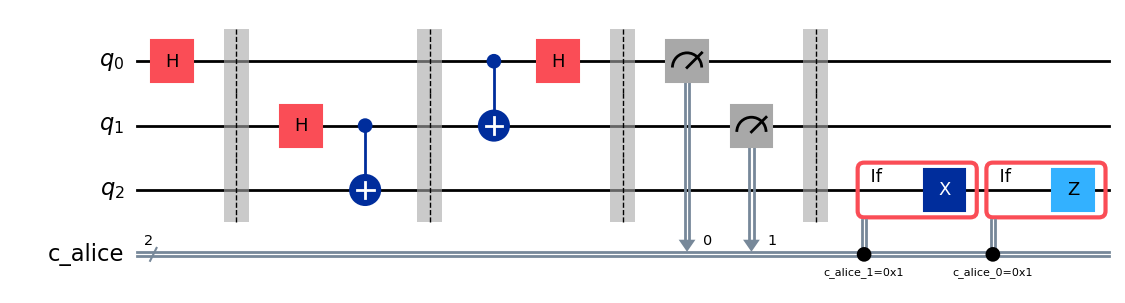

In [32]:
# Define quantum and classical registers
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # For Alice's measurements

# For verification with statevector, we don't measure Bob's final qubit in this circuit.
# If we were to run on hardware and verify by counts, we'd add a classical bit for Bob.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# Prepare Alice's message state |ψ> = |+> on q0
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# ---- TODO : Task 1 ---
# Step 1: Create Bell pair between q1 (Alice) and q2 (Bob)
teleport_qc.h(qr_tele[1])  # Hadamard gate on Alice's qubit q1
teleport_qc.cx(qr_tele[1], qr_tele[2])  # CNOT gate to create entanglement

# --- End of TODO --
teleport_qc.barrier()

# ---- TODO : Task 2 ---
# Step 2: Alice's Bell Measurement (gates part))

teleport_qc.cx(qr_tele[0], qr_tele[1])  # CNOT from message to Bell half
teleport_qc.h(qr_tele[0])               # Hadamard on the message qubit


# --- End of TODO --
teleport_qc.barrier()

# Alice measures her qubits q0 and q1
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# ---- TODO : Task 3 ---
# Step 3: Bob's Conditional Corrections on q2
# IMPORTANT: .c_if() on gates like XGate() no longer works directly as in older Qiskit versions.
# The recommended method in Qiskit 1.0+ is to use the new `if_test` context manager.

with teleport_qc.if_test((cr_alice_tele[1], 1)):
    teleport_qc.x(qr_tele[2])

with teleport_qc.if_test((cr_alice_tele[0], 1)):
    teleport_qc.z(qr_tele[2])



# --- End of TODO --

print("Full Teleportation Circuit (Check your Exercises 1, 2, 3):")
display(teleport_qc.draw('mpl'))

In [33]:
# Submit your answer using the following code
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


### Simulation and Verification

How do we verify that the teleportation worked? We can't directly 'see' the state of Bob's qubit after the protocol. However, since we *prepared* Alice's initial state `|ψ⟩` (we chose `|+>`), we can use a special type of simulation to check if Bob's qubit `q2` ended up in that same state.

We'll use `AerSimulator` with `save_statevector` to check if Bob's qubit `q2` ends up in Alice's original state (`|+>`). This simulator calculates the final quantum state vector.

<div class="alert alert-block alert-success">
<b>Exercise 7 - No Grading: Analyze result of Quantum Teleportation</b>

**Your Goal:** Verify the successful teleportation of Alice's quantum state to Bob's qubit by simulating the circuit and visualizing the final state of Bob's qubit.

**Task:**
* Extract the final statevector and use `plot_bloch_multivector` to visualize Bob's qubit (`q2`). Compare to Alice's initial state (`q0`).
</div>

Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


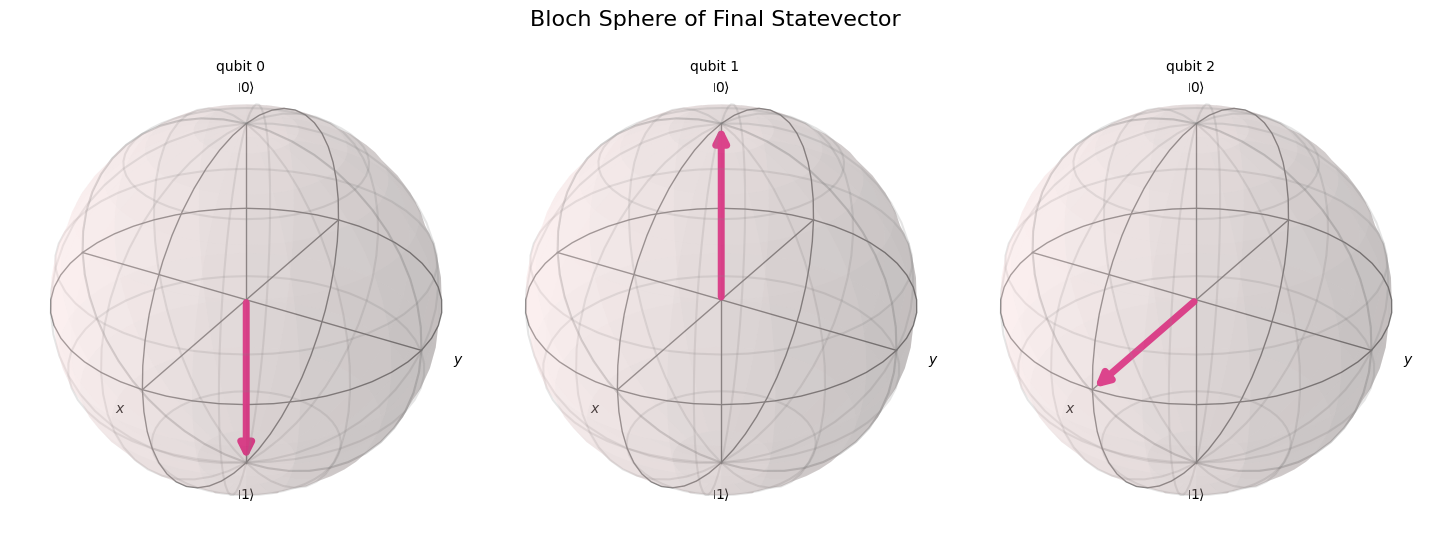

In [35]:
%matplotlib inline

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = teleport_qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0 was |+> (points along +X). After teleportation, q2 should be |+>.
    # q0 and q1 states are after Alice's measurement, so they'll be collapsed.
    
    # display("TODO") #TODO, use plot_bloch_multivector to plot final_state
    from qiskit.visualization import plot_bloch_multivector

    plot_bloch_multivector(final_statevector, title="Bloch Sphere of Final Statevector")
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

### Interpreting the Results

If Exercise 6 was correct, you should see:
* `q0` (Alice's original): Random state (collapsed by measurement).
* `q1` (Alice's entangled): Random state (collapsed by measurement).
* `q2` (Bob's entangled): Bloch sphere vector pointing along the **positive X-axis**. This is the `|+>` state, matching Alice's initial `q0`!

**Success!** The state `|ψ⟩ = |+⟩` was teleported.

### Conclusion: The Magic of Entanglement and Information

You have successfully implemented the quantum teleportation protocol!

Key Takeaways:
* Teleportation transfers an unknown quantum *state* using shared entanglement and classical communication.
* It doesn't transfer the physical particle itself.
* The original state on Alice's qubit is destroyed (consistent with the No-Cloning Theorem).
* Requires classical communication (Alice's measurement results to Bob), so no faster-than-light information transfer.

Quantum teleportation is foundational for quantum communication and computation.

**Discussion Point**: Why can't Alice just measure `q0` (e.g., in the Z basis then the X basis) and send results to Bob for reconstruction? What's different about teleportation?

In [36]:
#Check your submission status with the code belowf
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1833 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 1133 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 374 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ✅ 0 participants have completed this lab


# (Bonus Challenge) Teleportation on Real Quantum Hardware

We've seen teleportation work perfectly on a simulator. Now, let's try it on a **real IBM Quantum backend**! This is where the true challenges and excitement of quantum computing lie. Real devices have noise and limited qubit connectivity.

<div class="alert alert-block alert-warning">
<b>Dynamic Circuits are being upgraded!</b>

There is currently an update going on for dynamic circuits on the real hardware, and you are one of the first people to be able to test the new version! However, this early access comes with some caveats: 
* 1. We need to set some additional lines of codes for them to activate the early access (see below)
* 2. This early access doesn't work when using Session or Batch with a with... (e.g. with Batch(...)).  You can, however, pass one directly to the primitive (e.g. Sampler(mode=batch)).
* 3. You cannot use a ClassicalRegister of more than 32 bits in an if_test condition. You can, however, use multiple ClassicalRegisters, each of <=32 bits.
* 4. No nested conditional.
* 5. Cannot have measure or reset inside a conditional block.


</div>

Two steps are needed to use dynamic circuits on the real hardware:


Step 1 you need to add the instruction to the hardware you use:

 ```python
    # (1) Patch the backend target with IfElseOp
    from qiskit.circuit import IfElseOp
    backend.target.add_instruction(IfElseOp, name="if_else")
        
```




Step 2 when submitting the jobs you need to enable the experimental obtions:

 ```python
    #(2) Submit the job with the experimental option
    sampler.options.experimental = {"execution_path" : "gen3-experimental"}
        
```

### Dynamic Circuits: A Key for Real Hardware

The teleportation protocol inherently requires **dynamic circuits**: Alice measures her qubits, and Bob *classically communicates* these results to decide which correction gates to apply to his qubit. Qiskit enables these "mid-circuit measurements" and "classical feed-forward" operations.

Recent research, such as the work by Bäumer et al. in "Efficient Long-Range Entanglement Using Dynamic Circuits" (PRX QUANTUM 5, 030339 (2024)), demonstrates the power of dynamic circuits. They show that for tasks like CNOT gate teleportation and preparing GHZ states over long distances, dynamic circuits can outperform their purely unitary counterparts on large-scale devices by keeping the quantum circuit depth constant regardless of the distance.

For our teleportation protocol, dynamic circuits allow Alice's measurement outcomes to directly control Bob's gate applications in real time on the quantum processor. Accessing IBM Quantum backends is done through the **IBM Cloud**. You'll need an IBM Cloud account with Quantum services enabled.

### The Challenge: – How Far Can You Send It?

**Your Goal:** Successfully teleport a quantum state (e.g., $|+\rangle$) from 0th qubit (Alice's message) to another qubit (Bob's) on a real IBM Quantum backend, ideally choosing qubits that are not directly connected on the chip by using Qiskit Dynamic Circuits. Observe and report the fidelity of the teleportation. Try to improve it!

**Basic steps for a real backend run:**

You can find more detailed explanations in lab0, but here we give you an abstracted intro.

1.  Set up IBM Quantum Access (via IBM Cloud):
    * If you don't have one, create an IBM Cloud account and enable access to IBM Quantum services.
    * Get your API token from the IBM Quantum dashboard on IBM Cloud.
    * Use `QiskitRuntimeService` to save your account and list available backends.

       ```python
        from qiskit_ibm_runtime import QiskitRuntimeService
        QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token="YOUR_IBM_CLOUD_API_TOKEN", instance="YOUR_CRN_INSTANCE_ID_OR_CLOUD_INSTANCE_NAME", overwrite=True)
        service = QiskitRuntimeService(name="qgss-2025")
        print(service.backends())
        ```
       
2.  Choose a Backend:
    * Select an available backend from the list. Selecting the [least_busy](https://quantum.cloud.ibm.com/docs/api/qiskit-ibm-runtime/qiskit-runtime-service) QPU is also a good choice.
    * Examine its coupling map to find suitable qubits. For this challenge, try to pick qubits for Alice's message (`q_A_msg`) and Bob's final qubit (`q_B_ent`) that are "far apart" or not directly connected. Alice's entangled qubit (`q_A_ent`) should ideally be connectable to both `q_A_msg` (for her Bell measurement) and `q_B_ent` (for creating the initial Bell pair).

        ```python
        #backend_name = "ibm_your_chosen_backend" # e.g., "ibm_brisbane" or a simulator like "ibmq_qasm_simulator" to test flow
        backend = service.least_busy()
        # print(f"Coupling map: {backend.configuration().coupling_map}")
        # print(f"Number of qubits: {backend.configuration().n_qubits}")
        # from qiskit.visualization import plot_gate_map # if needed
        # display(plot_gate_map(backend)) # Visualizes connectivity
        
        ```
You can keep most of the code the same. To use a real quantum processing unit (QPU) instead of a simulator, simply pass the real backend object to the `Sampler`. However, it's crucial to transpile your circuit using a `PassManager`, especially when targeting actual quantum hardware.

<div class="alert alert-block alert-info">

<b>Tips</b>

* Technical Reference for Long-Range Entanglement: For a deeper technical dive into creating entanglement over distances on IBM hardware, including techniques that might inspire your qubit selection or circuit optimization, refer to the tutorial [Efficiently generating long-range entanglement](https://quantum.cloud.ibm.com/docs/tutorials/long-range-entanglement).
  
* Simulating Larger Circuits (20+ Qubits):
    * If you're designing or testing teleportation schemes that scale to 20 qubits or more for the total circuit size (including Alice's message, her ancilla, Bob's qubit, and any intermediary qubits for routing or advanced teleportation schemes), simulating the full statevector can become computationally intensive.
    * For such larger circuits, if your teleportation circuit (or components of it, like Bell state creation and Bell measurements) can be constructed using only **Clifford** gates (H, S, X, Y, Z, CNOT, SWAP, and their combinations), you can use a more efficient simulator.
    * Recommendation: Use `AerSimulator(method="stabilizer")`. The stabilizer simulator is optimized for Clifford circuits and can handle much larger qubit counts efficiently.
</div>

Good luck pushing the limits of quantum state transfer! Share your try and result with participants and discuss how you can send qubits "farther".

## References

1.  Young, Thomas (1804) I. The Bakerian Lecture. Experiments and calculations relative to physical optics. Phil. Trans. R. Soc. 941–16.
2. Fage, Arthur and Johansen, F. C. (1927). On the flow of air behind an inclined flat plate of infinite span. Proc. R. Soc. Lond. A116 170–197.
3. Clauser, J. F., Horne, M. A., Shimony, A., & Holt, R. A. (1969). Proposed Experiment to Test Local Hidden-Variable Theories. Phys. Rev. Lett., 23(15), 880–884.
4. Bouwmeester, D., Pan, J.-W., Mattle, K., Eibl, M., Weinfurter, H., & Zeilinger, A. (1997). Experimental quantum teleportation. Nature, 390(6660), 575–579.

# Additional information

**Created by:** Sophy Shin, James Weaver

**Advised by:** Marcel Pfaffhauser, Jessie Yu, Junye Huang, Borja Peropadre 

**Reviewed by:** Meltem Tolunay, Abby Cross

**Version:** 1.1.1